In [1]:
# import modules
import numpy as np

# import plotting modules
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

from IPython.display import Latex

In [2]:
from velocity_Mwolf_code import VelocityStuff

In [3]:
# initiate the analysis by calling the entire class

analyze = VelocityStuff()

In [4]:
# importing DM data

dm_h1 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dm_profile_vel_Jeon17/dwarf_dm_Jeon17_halo1_0303.txt")
dm_h3 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dm_profile_vel_Jeon17/dwarf_dm_Jeon17_halo3_0303.txt")
dm_h4 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dm_profile_vel_Jeon17/dwarf_dm_Jeon17_halo4_0303.txt")
dm_h5 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dm_profile_vel_Jeon17/dwarf_dm_Jeon17_halo5_0303.txt")
dm_h6 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dm_profile_vel_Jeon17/dwarf_dm_Jeon17_halo6_0303.txt")

In [5]:
bin_size = 0.02

# importing DM positions

dx_dm_h1 = dm_h1[:,4] / 1000 # converting pc to kpc
dy_dm_h1 = dm_h1[:,5] / 1000 # converting pc to kpc
dz_dm_h1 = dm_h1[:,6] / 1000 # converting pc to kpc
r_dm_h1 = np.sqrt(dx_dm_h1**2 + dy_dm_h1**2 + dz_dm_h1**2)

dx_dm_h3 = dm_h3[:,4] / 1000 # converting pc to kpc
dy_dm_h3 = dm_h3[:,5] / 1000 # converting pc to kpc
dz_dm_h3 = dm_h3[:,6] / 1000 # converting pc to kpc
r_dm_h3 = np.sqrt(dx_dm_h3**2 + dy_dm_h3**2 + dz_dm_h3**2)

dx_dm_h4 = dm_h4[:,4] / 1000 # converting pc to kpc
dy_dm_h4 = dm_h4[:,5] / 1000 # converting pc to kpc
dz_dm_h4 = dm_h4[:,6] / 1000 # converting pc to kpc
r_dm_h4 = np.sqrt(dx_dm_h4**2 + dy_dm_h4**2 + dz_dm_h4**2)

dx_dm_h5 = dm_h5[:,4] / 1000 # converting pc to kpc
dy_dm_h5 = dm_h5[:,5] / 1000 # converting pc to kpc
dz_dm_h5 = dm_h5[:,6] / 1000 # converting pc to kpc
r_dm_h5 = np.sqrt(dx_dm_h5**2 + dy_dm_h5**2 + dz_dm_h5**2)

dx_dm_h6 = dm_h6[:,4] / 1000 # converting pc to kpc
dy_dm_h6 = dm_h6[:,5] / 1000 # converting pc to kpc
dz_dm_h6 = dm_h6[:,6] / 1000 # converting pc to kpc
r_dm_h6 = np.sqrt(dx_dm_h6**2 + dy_dm_h6**2 + dz_dm_h6**2)

# importing DM velocities

vx_dm_COM_h1 = np.sum(dm_h1[:,7]) / np.size(dm_h1[:,7])
vy_dm_COM_h1 = np.sum(dm_h1[:,8]) / np.size(dm_h1[:,8])
vz_dm_COM_h1 = np.sum(dm_h1[:,9]) / np.size(dm_h1[:,9])
vx_dm_h1 = dm_h1[:,7] - vx_dm_COM_h1
vy_dm_h1 = dm_h1[:,8] - vy_dm_COM_h1
vz_dm_h1 = dm_h1[:,9] - vz_dm_COM_h1
v_dm_h1 = np.sqrt(vx_dm_h1**2 + vy_dm_h1**2 + vz_dm_h1**2)

vx_dm_COM_h3 = np.sum(dm_h3[:,7]) / np.size(dm_h3[:,7])
vy_dm_COM_h3 = np.sum(dm_h3[:,8]) / np.size(dm_h3[:,8])
vz_dm_COM_h3 = np.sum(dm_h3[:,9]) / np.size(dm_h3[:,9])
vx_dm_h3 = dm_h3[:,7] - vx_dm_COM_h3
vy_dm_h3 = dm_h3[:,8] - vy_dm_COM_h3
vz_dm_h3 = dm_h3[:,9] - vz_dm_COM_h3
v_dm_h3 = np.sqrt(vx_dm_h3**2 + vy_dm_h3**2 + vz_dm_h3**2)

vx_dm_COM_h4 = np.sum(dm_h4[:,7]) / np.size(dm_h4[:,7])
vy_dm_COM_h4 = np.sum(dm_h4[:,8]) / np.size(dm_h4[:,8])
vz_dm_COM_h4 = np.sum(dm_h4[:,9]) / np.size(dm_h4[:,9])
vx_dm_h4 = dm_h4[:,7] - vx_dm_COM_h4
vy_dm_h4 = dm_h4[:,8] - vy_dm_COM_h4
vz_dm_h4 = dm_h4[:,9] - vz_dm_COM_h4
v_dm_h4 = np.sqrt(vx_dm_h4**2 + vy_dm_h4**2 + vz_dm_h4**2)

vx_dm_COM_h5 = np.sum(dm_h5[:,7]) / np.size(dm_h5[:,7])
vy_dm_COM_h5 = np.sum(dm_h5[:,8]) / np.size(dm_h5[:,8])
vz_dm_COM_h5 = np.sum(dm_h5[:,9]) / np.size(dm_h5[:,9])
vx_dm_h5 = dm_h5[:,7] - vx_dm_COM_h5
vy_dm_h5 = dm_h5[:,8] - vy_dm_COM_h5
vz_dm_h5 = dm_h5[:,9] - vz_dm_COM_h5
v_dm_h5 = np.sqrt(vx_dm_h5**2 + vy_dm_h5**2 + vz_dm_h5**2)

vx_dm_COM_h6 = np.sum(dm_h6[:,7]) / np.size(dm_h6[:,7])
vy_dm_COM_h6 = np.sum(dm_h6[:,8]) / np.size(dm_h6[:,8])
vz_dm_COM_h6 = np.sum(dm_h6[:,9]) / np.size(dm_h6[:,9])
vx_dm_h6 = dm_h6[:,7] - vx_dm_COM_h6
vy_dm_h6 = dm_h6[:,8] - vy_dm_COM_h6
vz_dm_h6 = dm_h6[:,9] - vz_dm_COM_h6
v_dm_h6 = np.sqrt(vx_dm_h6**2 + vy_dm_h6**2 + vz_dm_h6**2)

In [6]:
print(vx_dm_COM_h1, vy_dm_COM_h1, vz_dm_COM_h1, 'vCOM, halo 1')
print(vx_dm_COM_h3, vy_dm_COM_h3, vz_dm_COM_h3, 'vCOM, halo 3')
print(vx_dm_COM_h4, vy_dm_COM_h4, vz_dm_COM_h4, 'vCOM, halo 4')
print(vx_dm_COM_h5, vy_dm_COM_h5, vz_dm_COM_h5, 'vCOM, halo 5')
print(vx_dm_COM_h6, vy_dm_COM_h6, vz_dm_COM_h6, 'vCOM, halo 6')

-1.866173526807069 -17.9586972456011 15.53114600221076 vCOM, halo 1
-4.215029601153439 -19.43940843818443 16.107903439238296 vCOM, halo 3
11.344518015978844 -25.705749526573516 29.739845815358056 vCOM, halo 4
12.098092368614926 -27.820544649041608 9.666622115227193 vCOM, halo 5
-5.320046644554381 -5.031170872087823 19.988291873071944 vCOM, halo 6


In [7]:
# make radius array for each dwarf

radius_array_h1 = np.arange(0.01, round(max(r_dm_h1), 2), bin_size)
radius_array_h3 = np.arange(0.01, round(max(r_dm_h3), 2), bin_size)
radius_array_h4 = np.arange(0.01, round(max(r_dm_h4), 2), bin_size)
radius_array_h5 = np.arange(0.01, round(max(r_dm_h5), 2), bin_size)
radius_array_h6 = np.arange(0.01, round(max(r_dm_h6), 2), bin_size)

In [8]:
# importing star data

star_h1 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dm_profile_vel_Jeon17/dwarf_star_Jeon17_halo1_0303.txt")
star_h3 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dm_profile_vel_Jeon17/dwarf_star_Jeon17_halo3_0303.txt")
star_h4 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dm_profile_vel_Jeon17/dwarf_star_Jeon17_halo4_0303.txt")
star_h5 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dm_profile_vel_Jeon17/dwarf_star_Jeon17_halo5_0303.txt")
star_h6 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dm_profile_vel_Jeon17/dwarf_star_Jeon17_halo6_0303.txt")

In [9]:
star_mass_h1 = star_h1[:,11]
star_mass_h3 = star_h3[:,11]
star_mass_h4 = star_h4[:,11]
star_mass_h5 = star_h5[:,11]
star_mass_h6 = star_h6[:,11]

## CASE 1: The star velocities are corrected according to the dark matter COM velocity within $r_{vir}$.

In [10]:
# First, correct the stars' position and velocity measurements according to the dark matter COM.
x_star_case1_h1 = star_h1[:,4] / 1000
y_star_case1_h1 = star_h1[:,5] / 1000
z_star_case1_h1 = star_h1[:,6] / 1000
r_star_case1_h1 = np.sqrt(x_star_case1_h1**2 + y_star_case1_h1**2 + z_star_case1_h1**2)

x_star_case1_h3 = star_h3[:,4] / 1000
y_star_case1_h3 = star_h3[:,5] / 1000
z_star_case1_h3 = star_h3[:,6] / 1000
r_star_case1_h3 = np.sqrt(x_star_case1_h3**2 + y_star_case1_h3**2 + z_star_case1_h3**2)

x_star_case1_h4 = star_h4[:,4] / 1000
y_star_case1_h4 = star_h4[:,5] / 1000
z_star_case1_h4 = star_h4[:,6] / 1000
r_star_case1_h4 = np.sqrt(x_star_case1_h4**2 + y_star_case1_h4**2 + z_star_case1_h4**2)

x_star_case1_h5 = star_h5[:,4] / 1000
y_star_case1_h5 = star_h5[:,5] / 1000
z_star_case1_h5 = star_h5[:,6] / 1000
r_star_case1_h5 = np.sqrt(x_star_case1_h5**2 + y_star_case1_h5**2 + z_star_case1_h5**2)

x_star_case1_h6 = star_h6[:,4] / 1000
y_star_case1_h6 = star_h6[:,5] / 1000
z_star_case1_h6 = star_h6[:,6] / 1000
r_star_case1_h6 = np.sqrt(x_star_case1_h6**2 + y_star_case1_h6**2 + z_star_case1_h6**2)

# This is the correction part

vx_star_dm_vCOM_h1 = star_h1[:,7] - vx_dm_COM_h1
vy_star_dm_vCOM_h1 = star_h1[:,8] - vy_dm_COM_h1
vz_star_dm_vCOM_h1 = star_h1[:,9] - vz_dm_COM_h1

vx_star_dm_vCOM_h3 = star_h3[:,7] - vx_dm_COM_h3
vy_star_dm_vCOM_h3 = star_h3[:,8] - vy_dm_COM_h3
vz_star_dm_vCOM_h3 = star_h3[:,9] - vz_dm_COM_h3

vx_star_dm_vCOM_h4 = star_h4[:,7] - vx_dm_COM_h4
vy_star_dm_vCOM_h4 = star_h4[:,8] - vy_dm_COM_h4
vz_star_dm_vCOM_h4 = star_h4[:,9] - vz_dm_COM_h4

vx_star_dm_vCOM_h5 = star_h5[:,7] - vx_dm_COM_h5
vy_star_dm_vCOM_h5 = star_h5[:,8] - vy_dm_COM_h5
vz_star_dm_vCOM_h5 = star_h5[:,9] - vz_dm_COM_h5

vx_star_dm_vCOM_h6 = star_h6[:,7] - vx_dm_COM_h6
vy_star_dm_vCOM_h6 = star_h6[:,8] - vy_dm_COM_h6
vz_star_dm_vCOM_h6 = star_h6[:,9] - vz_dm_COM_h6

print('Success!')

Success!


In [11]:
# Next, determine the stellar mass profile, the total mass, the stellar half-mass and r_half.
mass_prof1_h1, M_tot1_h1, M_half1_h1, r_half1_h1 = analyze.star_mass_analysis(bin_size, radius_array_h1, \
                                                            r_star_case1_h1, star_mass_h1)
mass_prof1_h3, M_tot1_h3, M_half1_h3, r_half1_h3 = analyze.star_mass_analysis(bin_size, radius_array_h3, \
                                                            r_star_case1_h3, star_mass_h3)
mass_prof1_h4, M_tot1_h4, M_half1_h4, r_half1_h4 = analyze.star_mass_analysis(bin_size, radius_array_h4, \
                                                            r_star_case1_h4, star_mass_h4)
mass_prof1_h5, M_tot1_h5, M_half1_h5, r_half1_h5 = analyze.star_mass_analysis(bin_size, radius_array_h5, \
                                                            r_star_case1_h5, star_mass_h5)
mass_prof1_h6, M_tot1_h6, M_half1_h6, r_half1_h6 = analyze.star_mass_analysis(bin_size, radius_array_h6, \
                                                            r_star_case1_h6, star_mass_h6)

print('total star mass (in Msun):', [M_tot1_h1, M_tot1_h3, M_tot1_h4, M_tot1_h5, M_tot1_h6])
print('half star mass (in Msun):', [M_half1_h1, M_half1_h3, M_half1_h4, M_half1_h5, M_half1_h6])
print('star half-mass radius (in kpc):', [r_half1_h1, r_half1_h3, r_half1_h4, r_half1_h5, r_half1_h6])

total star mass (in Msun): [44737.935, 84865.574, 131056.22899999999, 204151.37900000002, 890447.9800000001]
half star mass (in Msun): [22368.9675, 42432.787, 65528.114499999996, 102075.68950000001, 445223.99000000005]
star half-mass radius (in kpc): [0.6699999999999999, 0.5499999999999999, 0.9299999999999998, 1.0899999999999999, 0.5499999999999999]


In [12]:
# Next, calculate the velocity dispersion in each direction (x, y and z).

stdev_x1_h1 = analyze.weighted_stdev_star(vx_star_dm_vCOM_h1, star_mass_h1, bin_size, r_star_case1_h1, radius_array_h1)
stdev_y1_h1 = analyze.weighted_stdev_star(vy_star_dm_vCOM_h1, star_mass_h1, bin_size, r_star_case1_h1, radius_array_h1)
stdev_z1_h1 = analyze.weighted_stdev_star(vz_star_dm_vCOM_h1, star_mass_h1, bin_size, r_star_case1_h1, radius_array_h1)

stdev_x1_h3 = analyze.weighted_stdev_star(vx_star_dm_vCOM_h3, star_mass_h3, bin_size, r_star_case1_h3, radius_array_h3)
stdev_y1_h3 = analyze.weighted_stdev_star(vy_star_dm_vCOM_h3, star_mass_h3, bin_size, r_star_case1_h3, radius_array_h3)
stdev_z1_h3 = analyze.weighted_stdev_star(vz_star_dm_vCOM_h3, star_mass_h3, bin_size, r_star_case1_h3, radius_array_h3)

stdev_x1_h4 = analyze.weighted_stdev_star(vx_star_dm_vCOM_h4, star_mass_h4, bin_size, r_star_case1_h4, radius_array_h4)
stdev_y1_h4 = analyze.weighted_stdev_star(vy_star_dm_vCOM_h4, star_mass_h4, bin_size, r_star_case1_h4, radius_array_h4)
stdev_z1_h4 = analyze.weighted_stdev_star(vz_star_dm_vCOM_h4, star_mass_h4, bin_size, r_star_case1_h4, radius_array_h4)

stdev_x1_h5 = analyze.weighted_stdev_star(vx_star_dm_vCOM_h5, star_mass_h5, bin_size, r_star_case1_h5, radius_array_h5)
stdev_y1_h5 = analyze.weighted_stdev_star(vy_star_dm_vCOM_h5, star_mass_h5, bin_size, r_star_case1_h5, radius_array_h5)
stdev_z1_h5 = analyze.weighted_stdev_star(vz_star_dm_vCOM_h5, star_mass_h5, bin_size, r_star_case1_h5, radius_array_h5)

stdev_x1_h6 = analyze.weighted_stdev_star(vx_star_dm_vCOM_h6, star_mass_h6, bin_size, r_star_case1_h6, radius_array_h6)
stdev_y1_h6 = analyze.weighted_stdev_star(vy_star_dm_vCOM_h6, star_mass_h6, bin_size, r_star_case1_h6, radius_array_h6)
stdev_z1_h6 = analyze.weighted_stdev_star(vz_star_dm_vCOM_h6, star_mass_h6, bin_size, r_star_case1_h6, radius_array_h6)

print('Success!')

C:\Users\nguye\Binh_UFD\velocity analysis\velocity_Mwolf_code.py:131: RuntimeWarning: invalid value encountered in double_scalars
  weighted_mean = np.sum(velocity_array * enclosed_mass) / np.sum(enclosed_mass)
C:\Users\nguye\Binh_UFD\velocity analysis\velocity_Mwolf_code.py:132: RuntimeWarning: invalid value encountered in double_scalars
  unsquared_weighted_stdev = (np.sum(enclosed_mass * (velocity_array - weighted_mean)**2)) / np.sum(enclosed_mass)


Success!


In [13]:
# Next, find the ratio between the Wolf mass estimate and the dynamical mass at r_half.

stdev_star_rhalf_x1_h1, M_real1_h1, M_wolf_x1_h1 = analyze.Wolf_mass_at_rhalf(vx_star_dm_vCOM_h1, star_mass_h1, \
                                              bin_size, r_star_case1_h1, r_dm_h1, radius_array_h1)
stdev_star_rhalf_y1_h1, M_real1_h1, M_wolf_y1_h1 = analyze.Wolf_mass_at_rhalf(vy_star_dm_vCOM_h1, star_mass_h1, \
                                              bin_size, r_star_case1_h1, r_dm_h1, radius_array_h1)
stdev_star_rhalf_z1_h1, M_real1_h1, M_wolf_z1_h1 = analyze.Wolf_mass_at_rhalf(vz_star_dm_vCOM_h1, star_mass_h1, \
                                              bin_size, r_star_case1_h1, r_dm_h1, radius_array_h1)

stdev_star_rhalf_x1_h3, M_real1_h3, M_wolf_x1_h3 = analyze.Wolf_mass_at_rhalf(vx_star_dm_vCOM_h3, star_mass_h3, \
                                              bin_size, r_star_case1_h3, r_dm_h3, radius_array_h3)
stdev_star_rhalf_y1_h3, M_real1_h3, M_wolf_y1_h3 = analyze.Wolf_mass_at_rhalf(vy_star_dm_vCOM_h3, star_mass_h3, \
                                              bin_size, r_star_case1_h3, r_dm_h3, radius_array_h3)
stdev_star_rhalf_z1_h3, M_real1_h3, M_wolf_z1_h3 = analyze.Wolf_mass_at_rhalf(vz_star_dm_vCOM_h3, star_mass_h3, \
                                              bin_size, r_star_case1_h3, r_dm_h3, radius_array_h3)

stdev_star_rhalf_x1_h4, M_real1_h4, M_wolf_x1_h4 = analyze.Wolf_mass_at_rhalf(vx_star_dm_vCOM_h4, star_mass_h4, \
                                              bin_size, r_star_case1_h4, r_dm_h4, radius_array_h4)
stdev_star_rhalf_y1_h4, M_real1_h4, M_wolf_y1_h4 = analyze.Wolf_mass_at_rhalf(vy_star_dm_vCOM_h4, star_mass_h4, \
                                              bin_size, r_star_case1_h4, r_dm_h4, radius_array_h4)
stdev_star_rhalf_z1_h4, M_real1_h4, M_wolf_z1_h4 = analyze.Wolf_mass_at_rhalf(vz_star_dm_vCOM_h4, star_mass_h4, \
                                              bin_size, r_star_case1_h4, r_dm_h4, radius_array_h4)

stdev_star_rhalf_x1_h5, M_real1_h5, M_wolf_x1_h5 = analyze.Wolf_mass_at_rhalf(vx_star_dm_vCOM_h5, star_mass_h5, \
                                              bin_size, r_star_case1_h5, r_dm_h5, radius_array_h5)
stdev_star_rhalf_y1_h5, M_real1_h5, M_wolf_y1_h5 = analyze.Wolf_mass_at_rhalf(vy_star_dm_vCOM_h5, star_mass_h5, \
                                              bin_size, r_star_case1_h5, r_dm_h5, radius_array_h5)
stdev_star_rhalf_z1_h5, M_real1_h5, M_wolf_z1_h5 = analyze.Wolf_mass_at_rhalf(vz_star_dm_vCOM_h5, star_mass_h5, \
                                              bin_size, r_star_case1_h5, r_dm_h5, radius_array_h5)

stdev_star_rhalf_x1_h6, M_real1_h6, M_wolf_x1_h6 = analyze.Wolf_mass_at_rhalf(vx_star_dm_vCOM_h6, star_mass_h6, \
                                              bin_size, r_star_case1_h6, r_dm_h6, radius_array_h6)
stdev_star_rhalf_y1_h6, M_real1_h6, M_wolf_y1_h6 = analyze.Wolf_mass_at_rhalf(vy_star_dm_vCOM_h6, star_mass_h6, \
                                              bin_size, r_star_case1_h6, r_dm_h6, radius_array_h6)
stdev_star_rhalf_z1_h6, M_real1_h6, M_wolf_z1_h6 = analyze.Wolf_mass_at_rhalf(vz_star_dm_vCOM_h6, star_mass_h6, \
                                              bin_size, r_star_case1_h6, r_dm_h6, radius_array_h6)

print('sigma_rhalf in x (in km/s):', [stdev_star_rhalf_x1_h1, stdev_star_rhalf_x1_h3, stdev_star_rhalf_x1_h4, \
                                     stdev_star_rhalf_x1_h5, stdev_star_rhalf_x1_h6])
print('sigma_rhalf in y (in km/s):', [stdev_star_rhalf_y1_h1, stdev_star_rhalf_y1_h3, stdev_star_rhalf_y1_h4, \
                                     stdev_star_rhalf_y1_h5, stdev_star_rhalf_y1_h6])
print('sigma_rhalf in z (in km/s):', [stdev_star_rhalf_z1_h1, stdev_star_rhalf_z1_h3, stdev_star_rhalf_z1_h4, \
                                     stdev_star_rhalf_z1_h5, stdev_star_rhalf_z1_h6])
print('total DM mass (in Msun):', [M_real1_h1, M_real1_h3, M_real1_h4, M_real1_h5, M_real1_h6])
print('Wolf mass estimate in x:', [M_wolf_x1_h1, M_wolf_x1_h3, M_wolf_x1_h4, M_wolf_x1_h5, M_wolf_x1_h6])
print('Wolf mass estimate in y:', [M_wolf_y1_h1, M_wolf_y1_h3, M_wolf_y1_h4, M_wolf_y1_h5, M_wolf_y1_h6])
print('Wolf mass estimate in z:', [M_wolf_z1_h1, M_wolf_z1_h3, M_wolf_z1_h4, M_wolf_z1_h5, M_wolf_z1_h6])

sigma_rhalf in x (in km/s): [6.592381346018733, 6.679547991279137, 15.087022333526743, 9.192322881930007, 11.84544464745864]
sigma_rhalf in y (in km/s): [6.313868442090675, 7.339898181652765, 9.762196594134416, 10.19021358721185, 11.636631978663972]
sigma_rhalf in z (in km/s): [6.251281834118346, 6.203824990921698, 8.757006662791428, 10.37857750219252, 10.80831130477077]
total DM mass (in Msun): [7134000.0, 6031000.0, 19092500.0, 21280500.0, 8240500.0]
Wolf mass estimate in x: [2064209.8069435298, 1409400.312047668, 9101884.919156881, 7617986.107108541, 2499416.637812717]
Wolf mass estimate in y: [1977001.7045184758, 1548735.7529470304, 5889458.369829701, 8444971.58476114, 2455356.67433271]
Wolf mass estimate in z: [1957404.553932241, 1309021.6418101883, 5283034.989873028, 8601075.075231882, 2280579.0669579557]


#### Finally, compute the unweighted DARK MATTER velocity dispersion at r_half in each direction (x, y and z)

stdev_dm_rhalf_x1 = analyze.stdev_dm_rhalf(vx_dm_halo1, bin_size, r_dm_halo1, \
                                           radius_array, r_star_case1, star_mass_halo1)
stdev_dm_rhalf_y1 = analyze.stdev_dm_rhalf(vy_dm_halo1, bin_size, r_dm_halo1, \
                                           radius_array, r_star_case1, star_mass_halo1)
stdev_dm_rhalf_z1 = analyze.stdev_dm_rhalf(vz_dm_halo1, bin_size, r_dm_halo1, \
                                           radius_array, r_star_case1, star_mass_halo1)

print('success!')

## CASE 2: The star positions & velocities are corrected according to the stellar COM within $r_{vir}$.

In [14]:
# First, find the stellar COM (both for position and velocity) within r_vir.
COM_x_h1, COM_y_h1, COM_z_h1 = analyze.find_star_COM(star_h1[:,2][0], star_h1[:,11], \
                                            star_h1[:,4], star_h1[:,5], star_h1[:,6])
COM_vx_h1, COM_vy_h1, COM_vz_h1 = analyze.find_star_vCOM(star_h1[:,2][0], star_mass_h1, \
                                                star_h1[:,7], star_h1[:,8], star_h1[:,9], \
                                                star_h1[:,4], star_h1[:,5], star_h1[:,6])

COM_x_h3, COM_y_h3, COM_z_h3 = analyze.find_star_COM(star_h3[:,2][0], star_h3[:,11], \
                                            star_h3[:,4], star_h3[:,5], star_h3[:,6])
COM_vx_h3, COM_vy_h3, COM_vz_h3 = analyze.find_star_vCOM(star_h3[:,2][0], star_mass_h3, \
                                                star_h3[:,7], star_h3[:,8], star_h3[:,9], \
                                                star_h3[:,4], star_h3[:,5], star_h3[:,6])

COM_x_h4, COM_y_h4, COM_z_h4 = analyze.find_star_COM(star_h4[:,2][0], star_h4[:,11], \
                                            star_h4[:,4], star_h4[:,5], star_h4[:,6])
COM_vx_h4, COM_vy_h4, COM_vz_h4 = analyze.find_star_vCOM(star_h4[:,2][0], star_mass_h4, \
                                                star_h4[:,7], star_h4[:,8], star_h4[:,9], \
                                                star_h4[:,4], star_h4[:,5], star_h4[:,6])

COM_x_h5, COM_y_h5, COM_z_h5 = analyze.find_star_COM(star_h5[:,2][0], star_h5[:,11], \
                                            star_h5[:,4], star_h5[:,5], star_h5[:,6])
COM_vx_h5, COM_vy_h5, COM_vz_h5 = analyze.find_star_vCOM(star_h5[:,2][0], star_mass_h5, \
                                                star_h5[:,7], star_h5[:,8], star_h5[:,9], \
                                                star_h5[:,4], star_h5[:,5], star_h5[:,6])

COM_x_h6, COM_y_h6, COM_z_h6 = analyze.find_star_COM(star_h6[:,2][0], star_h6[:,11], \
                                            star_h6[:,4], star_h6[:,5], star_h6[:,6])
COM_vx_h6, COM_vy_h6, COM_vz_h6 = analyze.find_star_vCOM(star_h6[:,2][0], star_mass_h6, \
                                                star_h6[:,7], star_h6[:,8], star_h6[:,9], \
                                                star_h6[:,4], star_h6[:,5], star_h6[:,6])

# Next, correct the stars' position and velocity measurements according to the stellar COM.
x_star_h1 = (star_h1[:,4] - COM_x_h1) / 1000 # converting pc to kpc
y_star_h1 = (star_h1[:,5] - COM_y_h1) / 1000 # converting pc to kpc
z_star_h1 = (star_h1[:,6] - COM_z_h1) / 1000 # converting pc to kpc
r_star_case2_h1 = np.sqrt(x_star_h1**2 + y_star_h1**2 + z_star_h1**2)
vx_star_stel_vCOM_h1 = star_h1[:,7] - COM_vx_h1
vy_star_stel_vCOM_h1 = star_h1[:,8] - COM_vy_h1
vz_star_stel_vCOM_h1 = star_h1[:,9] - COM_vz_h1
v_star_case2_h1 = np.sqrt(vx_star_stel_vCOM_h1**2 + vy_star_stel_vCOM_h1**2 + vz_star_stel_vCOM_h1**2)

x_star_h3 = (star_h3[:,4] - COM_x_h3) / 1000 # converting pc to kpc
y_star_h3 = (star_h3[:,5] - COM_y_h3) / 1000 # converting pc to kpc
z_star_h3 = (star_h3[:,6] - COM_z_h3) / 1000 # converting pc to kpc
r_star_case2_h3 = np.sqrt(x_star_h3**2 + y_star_h3**2 + z_star_h3**2)
vx_star_stel_vCOM_h3 = star_h3[:,7] - COM_vx_h3
vy_star_stel_vCOM_h3 = star_h3[:,8] - COM_vy_h3
vz_star_stel_vCOM_h3 = star_h3[:,9] - COM_vz_h3
v_star_case2_h3 = np.sqrt(vx_star_stel_vCOM_h3**2 + vy_star_stel_vCOM_h3**2 + vz_star_stel_vCOM_h3**2)

x_star_h4 = (star_h4[:,4] - COM_x_h4) / 1000 # converting pc to kpc
y_star_h4 = (star_h4[:,5] - COM_y_h4) / 1000 # converting pc to kpc
z_star_h4 = (star_h4[:,6] - COM_z_h4) / 1000 # converting pc to kpc
r_star_case2_h4 = np.sqrt(x_star_h4**2 + y_star_h4**2 + z_star_h4**2)
vx_star_stel_vCOM_h4 = star_h4[:,7] - COM_vx_h4
vy_star_stel_vCOM_h4 = star_h4[:,8] - COM_vy_h4
vz_star_stel_vCOM_h4 = star_h4[:,9] - COM_vz_h4
v_star_case2_h4 = np.sqrt(vx_star_stel_vCOM_h4**2 + vy_star_stel_vCOM_h4**2 + vz_star_stel_vCOM_h4**2)

x_star_h5 = (star_h5[:,4] - COM_x_h5) / 1000 # converting pc to kpc
y_star_h5 = (star_h5[:,5] - COM_y_h5) / 1000 # converting pc to kpc
z_star_h5 = (star_h5[:,6] - COM_z_h5) / 1000 # converting pc to kpc
r_star_case2_h5 = np.sqrt(x_star_h5**2 + y_star_h5**2 + z_star_h5**2)
vx_star_stel_vCOM_h5 = star_h5[:,7] - COM_vx_h5
vy_star_stel_vCOM_h5 = star_h5[:,8] - COM_vy_h5
vz_star_stel_vCOM_h5 = star_h5[:,9] - COM_vz_h5
v_star_case2_h5 = np.sqrt(vx_star_stel_vCOM_h5**2 + vy_star_stel_vCOM_h5**2 + vz_star_stel_vCOM_h5**2)

x_star_h6 = (star_h6[:,4] - COM_x_h6) / 1000 # converting pc to kpc
y_star_h6 = (star_h6[:,5] - COM_y_h6) / 1000 # converting pc to kpc
z_star_h6 = (star_h6[:,6] - COM_z_h6) / 1000 # converting pc to kpc
r_star_case2_h6 = np.sqrt(x_star_h6**2 + y_star_h6**2 + z_star_h6**2)
vx_star_stel_vCOM_h6 = star_h6[:,7] - COM_vx_h6
vy_star_stel_vCOM_h6 = star_h6[:,8] - COM_vy_h6
vz_star_stel_vCOM_h6 = star_h6[:,9] - COM_vz_h6
v_star_case2_h6 = np.sqrt(vx_star_stel_vCOM_h6**2 + vy_star_stel_vCOM_h6**2 + vz_star_stel_vCOM_h6**2)

In [15]:
# Next, determine the stellar mass profile, the total mass, the stellar half-mass and r_half.
mass_prof2_h1, M_tot2_h1, M_half2_h1, r_half2_h1 = analyze.star_mass_analysis(bin_size, radius_array_h1, \
                                                            r_star_case2_h1, star_mass_h1)
mass_prof2_h3, M_tot2_h3, M_half2_h3, r_half2_h3 = analyze.star_mass_analysis(bin_size, radius_array_h3, \
                                                            r_star_case2_h3, star_mass_h3)
mass_prof2_h4, M_tot2_h4, M_half2_h4, r_half2_h4 = analyze.star_mass_analysis(bin_size, radius_array_h4, \
                                                            r_star_case2_h4, star_mass_h4)
mass_prof2_h5, M_tot2_h5, M_half2_h5, r_half2_h5 = analyze.star_mass_analysis(bin_size, radius_array_h5, \
                                                            r_star_case2_h5, star_mass_h5)
mass_prof2_h6, M_tot2_h6, M_half2_h6, r_half2_h6 = analyze.star_mass_analysis(bin_size, radius_array_h6, \
                                                            r_star_case2_h6, star_mass_h6)

print('total star mass (in Msun):', [M_tot2_h1, M_tot2_h3, M_tot2_h4, M_tot2_h5, M_tot2_h6])
print('half star mass (in Msun):', [M_half2_h1, M_half2_h3, M_half2_h4, M_half2_h5, M_half2_h6])
print('star half-mass radius (in kpc):', [r_half2_h1, r_half2_h3, r_half2_h4, r_half2_h5, r_half2_h6])

total star mass (in Msun): [44737.935, 84865.574, 131056.22899999999, 204151.37900000002, 890447.9800000001]
half star mass (in Msun): [22368.9675, 42432.787, 65528.114499999996, 102075.68950000001, 445223.99000000005]
star half-mass radius (in kpc): [0.9299999999999998, 1.2899999999999998, 0.9299999999999998, 1.9099999999999997, 0.5299999999999999]


In [16]:
# Next, calculate the weighted STELLAR velocity dispersion in each direction (x, y and z).

stdev_x2_h1 = analyze.weighted_stdev_star(vx_star_stel_vCOM_h1, star_mass_h1, bin_size, r_star_case2_h1, radius_array_h1)
stdev_y2_h1 = analyze.weighted_stdev_star(vy_star_stel_vCOM_h1, star_mass_h1, bin_size, r_star_case2_h1, radius_array_h1)
stdev_z2_h1 = analyze.weighted_stdev_star(vz_star_stel_vCOM_h1, star_mass_h1, bin_size, r_star_case2_h1, radius_array_h1)

stdev_x2_h3 = analyze.weighted_stdev_star(vx_star_stel_vCOM_h3, star_mass_h3, bin_size, r_star_case2_h3, radius_array_h3)
stdev_y2_h3 = analyze.weighted_stdev_star(vy_star_stel_vCOM_h3, star_mass_h3, bin_size, r_star_case2_h3, radius_array_h3)
stdev_z2_h3 = analyze.weighted_stdev_star(vz_star_stel_vCOM_h3, star_mass_h3, bin_size, r_star_case2_h3, radius_array_h3)

stdev_x2_h4 = analyze.weighted_stdev_star(vx_star_stel_vCOM_h4, star_mass_h4, bin_size, r_star_case2_h4, radius_array_h4)
stdev_y2_h4 = analyze.weighted_stdev_star(vy_star_stel_vCOM_h4, star_mass_h4, bin_size, r_star_case2_h4, radius_array_h4)
stdev_z2_h4 = analyze.weighted_stdev_star(vz_star_stel_vCOM_h4, star_mass_h4, bin_size, r_star_case2_h4, radius_array_h4)

stdev_x2_h5 = analyze.weighted_stdev_star(vx_star_stel_vCOM_h5, star_mass_h5, bin_size, r_star_case2_h5, radius_array_h5)
stdev_y2_h5 = analyze.weighted_stdev_star(vy_star_stel_vCOM_h5, star_mass_h5, bin_size, r_star_case2_h5, radius_array_h5)
stdev_z2_h5 = analyze.weighted_stdev_star(vz_star_stel_vCOM_h5, star_mass_h5, bin_size, r_star_case2_h5, radius_array_h5)

stdev_x2_h6 = analyze.weighted_stdev_star(vx_star_stel_vCOM_h6, star_mass_h6, bin_size, r_star_case2_h6, radius_array_h6)
stdev_y2_h6 = analyze.weighted_stdev_star(vy_star_stel_vCOM_h6, star_mass_h6, bin_size, r_star_case2_h6, radius_array_h6)
stdev_z2_h6 = analyze.weighted_stdev_star(vz_star_stel_vCOM_h6, star_mass_h6, bin_size, r_star_case2_h6, radius_array_h6)

In [17]:
# Next, find the ratio between the Wolf mass estimate and the dynamical mass at r_half.

stdev_star_rhalf_x2_h1, M_real2_h1, M_wolf_x2_h1 = analyze.Wolf_mass_at_rhalf(vx_star_stel_vCOM_h1, star_mass_h1, \
                                              bin_size, r_star_case2_h1, r_dm_h1, radius_array_h1)
stdev_star_rhalf_y2_h1, M_real2_h1, M_wolf_y2_h1 = analyze.Wolf_mass_at_rhalf(vy_star_stel_vCOM_h1, star_mass_h1, \
                                              bin_size, r_star_case2_h1, r_dm_h1, radius_array_h1)
stdev_star_rhalf_z2_h1, M_real2_h1, M_wolf_z2_h1 = analyze.Wolf_mass_at_rhalf(vz_star_stel_vCOM_h1, star_mass_h1, \
                                              bin_size, r_star_case2_h1, r_dm_h1, radius_array_h1)

stdev_star_rhalf_x2_h3, M_real2_h3, M_wolf_x2_h3 = analyze.Wolf_mass_at_rhalf(vx_star_stel_vCOM_h3, star_mass_h3, \
                                              bin_size, r_star_case2_h3, r_dm_h3, radius_array_h3)
stdev_star_rhalf_y2_h3, M_real2_h3, M_wolf_y2_h3 = analyze.Wolf_mass_at_rhalf(vy_star_stel_vCOM_h3, star_mass_h3, \
                                              bin_size, r_star_case2_h3, r_dm_h3, radius_array_h3)
stdev_star_rhalf_z2_h3, M_real2_h3, M_wolf_z2_h3 = analyze.Wolf_mass_at_rhalf(vz_star_stel_vCOM_h3, star_mass_h3, \
                                              bin_size, r_star_case2_h3, r_dm_h3, radius_array_h3)

stdev_star_rhalf_x2_h4, M_real2_h4, M_wolf_x2_h4 = analyze.Wolf_mass_at_rhalf(vx_star_stel_vCOM_h4, star_mass_h4, \
                                              bin_size, r_star_case2_h4, r_dm_h4, radius_array_h4)
stdev_star_rhalf_y2_h4, M_real2_h4, M_wolf_y2_h4 = analyze.Wolf_mass_at_rhalf(vy_star_stel_vCOM_h4, star_mass_h4, \
                                              bin_size, r_star_case2_h4, r_dm_h4, radius_array_h4)
stdev_star_rhalf_z2_h4, M_real2_h4, M_wolf_z2_h4 = analyze.Wolf_mass_at_rhalf(vz_star_stel_vCOM_h4, star_mass_h4, \
                                              bin_size, r_star_case2_h4, r_dm_h4, radius_array_h4)

stdev_star_rhalf_x2_h5, M_real2_h5, M_wolf_x2_h5 = analyze.Wolf_mass_at_rhalf(vx_star_stel_vCOM_h5, star_mass_h5, \
                                              bin_size, r_star_case2_h5, r_dm_h5, radius_array_h5)
stdev_star_rhalf_y2_h5, M_real2_h5, M_wolf_y2_h5 = analyze.Wolf_mass_at_rhalf(vy_star_stel_vCOM_h5, star_mass_h5, \
                                              bin_size, r_star_case2_h5, r_dm_h5, radius_array_h5)
stdev_star_rhalf_z2_h5, M_real2_h5, M_wolf_z2_h5 = analyze.Wolf_mass_at_rhalf(vz_star_stel_vCOM_h5, star_mass_h5, \
                                              bin_size, r_star_case2_h5, r_dm_h5, radius_array_h5)

stdev_star_rhalf_x2_h6, M_real2_h6, M_wolf_x2_h6 = analyze.Wolf_mass_at_rhalf(vx_star_stel_vCOM_h6, star_mass_h6, \
                                              bin_size, r_star_case2_h6, r_dm_h6, radius_array_h6)
stdev_star_rhalf_y2_h6, M_real2_h6, M_wolf_y2_h6 = analyze.Wolf_mass_at_rhalf(vy_star_stel_vCOM_h6, star_mass_h6, \
                                              bin_size, r_star_case2_h6, r_dm_h6, radius_array_h6)
stdev_star_rhalf_z2_h6, M_real2_h6, M_wolf_z2_h6 = analyze.Wolf_mass_at_rhalf(vz_star_stel_vCOM_h6, star_mass_h6, \
                                              bin_size, r_star_case2_h6, r_dm_h6, radius_array_h6)

print('sigma_rhalf in x (in km/s):', [stdev_star_rhalf_x2_h1, stdev_star_rhalf_x2_h3, stdev_star_rhalf_x2_h4, \
                                     stdev_star_rhalf_x2_h5, stdev_star_rhalf_x2_h6])
print('sigma_rhalf in y (in km/s):', [stdev_star_rhalf_y2_h1, stdev_star_rhalf_y2_h3, stdev_star_rhalf_y2_h4, \
                                     stdev_star_rhalf_y2_h5, stdev_star_rhalf_y2_h6])
print('sigma_rhalf in z (in km/s):', [stdev_star_rhalf_z2_h1, stdev_star_rhalf_z2_h3, stdev_star_rhalf_z2_h4, \
                                     stdev_star_rhalf_z2_h5, stdev_star_rhalf_z2_h6])
print('total DM mass (in Msun):', [M_real2_h1, M_real2_h3, M_real2_h4, M_real2_h5, M_real2_h6])
print('Wolf mass estimate in x:', [M_wolf_x2_h1, M_wolf_x2_h3, M_wolf_x2_h4, M_wolf_x2_h5, M_wolf_x2_h6])
print('Wolf mass estimate in x:', [M_wolf_y2_h1, M_wolf_y2_h3, M_wolf_y2_h4, M_wolf_y2_h5, M_wolf_y2_h6])
print('Wolf mass estimate in x:', [M_wolf_z2_h1, M_wolf_z2_h3, M_wolf_z2_h4, M_wolf_z2_h5, M_wolf_z2_h6])

sigma_rhalf in x (in km/s): [7.157367136332148, 6.801499964243685, 15.347573924819718, 9.216507308085808, 11.750891284317586]
sigma_rhalf in y (in km/s): [7.632658332778771, 8.024716195794273, 9.75338212140092, 10.165205763203977, 11.655735518016003]
sigma_rhalf in z (in km/s): [6.448179582115223, 6.295599546001591, 8.829612447162118, 9.879254656917903, 10.850795533312176]
total DM mass (in Msun): [11523500.0, 21114000.0, 19092500.0, 47536000.0, 7629500.0]
Wolf mass estimate in x: [4317984.726136627, 7894889.039850667, 9259073.696837803, 23452817.068958465, 2302419.5134261264]
Wolf mass estimate in x: [4604724.261447853, 9314745.905336961, 5884140.665999898, 25866925.860688053, 2283775.0984752225]
Wolf mass estimate in x: [3890137.3111940213, 7307661.562348284, 5326837.502999731, 25139279.39308205, 2126058.5914395056]


#### Finally, compute the unweighted DARK MATTER velocity dispersion at r_half in each direction (x, y and z)

stdev_dm_rhalf_x2 = analyze.stdev_dm_rhalf(vx_dm_halo1, bin_size, r_dm_halo1, \
                                           radius_array, r_star_case2, star_mass_halo1)
stdev_dm_rhalf_y2 = analyze.stdev_dm_rhalf(vy_dm_halo1, bin_size, r_dm_halo1, \
                                           radius_array, r_star_case2, star_mass_halo1)
stdev_dm_rhalf_z2 = analyze.stdev_dm_rhalf(vz_dm_halo1, bin_size, r_dm_halo1, \
                                           radius_array, r_star_case2, star_mass_halo1)

## CASE 3: The star positions & velocities are corrected according to the stellar COM within a radius of 1,000 pc, which is where most stars are concentrated based on the contour plots

In [18]:
# First, find the stellar COM (both for position and velocity) within 1000 pc.

radius_array_1kpc = np.arange(0.01, 1, bin_size)

COM_x_h1, COM_y_h1, COM_z_h1 = analyze.find_star_COM(1000, star_mass_h1, \
                                            star_h1[:,4], star_h1[:,5], star_h1[:,6])
COM_vx_h1, COM_vy_h1, COM_vz_h1 = analyze.find_star_vCOM(1000, star_mass_h1, \
                                                star_h1[:,7], star_h1[:,8], star_h1[:,9], \
                                                star_h1[:,4], star_h1[:,5], star_h1[:,6])

COM_x_h3, COM_y_h3, COM_z_h3 = analyze.find_star_COM(1000, star_mass_h3, \
                                            star_h3[:,4], star_h3[:,5], star_h3[:,6])
COM_vx_h3, COM_vy_h3, COM_vz_h3 = analyze.find_star_vCOM(1000, star_mass_h3, \
                                                star_h3[:,7], star_h3[:,8], star_h3[:,9], \
                                                star_h3[:,4], star_h3[:,5], star_h3[:,6])

COM_x_h4, COM_y_h4, COM_z_h4 = analyze.find_star_COM(1000, star_mass_h4, \
                                            star_h4[:,4], star_h4[:,5], star_h4[:,6])
COM_vx_h4, COM_vy_h4, COM_vz_h4 = analyze.find_star_vCOM(1000, star_mass_h4, \
                                                star_h4[:,7], star_h4[:,8], star_h4[:,9], \
                                                star_h4[:,4], star_h4[:,5], star_h4[:,6])

COM_x_h5, COM_y_h5, COM_z_h5 = analyze.find_star_COM(1000, star_mass_h5, \
                                            star_h5[:,4], star_h5[:,5], star_h5[:,6])
COM_vx_h5, COM_vy_h5, COM_vz_h5 = analyze.find_star_vCOM(1000, star_mass_h5, \
                                                star_h5[:,7], star_h5[:,8], star_h5[:,9], \
                                                star_h5[:,4], star_h5[:,5], star_h5[:,6])

COM_x_h6, COM_y_h6, COM_z_h6 = analyze.find_star_COM(1000, star_mass_h6, \
                                            star_h6[:,4], star_h6[:,5], star_h6[:,6])
COM_vx_h6, COM_vy_h6, COM_vz_h6 = analyze.find_star_vCOM(1000, star_mass_h6, \
                                                star_h6[:,7], star_h6[:,8], star_h6[:,9], \
                                                star_h6[:,4], star_h6[:,5], star_h6[:,6])

# Next, correct the stars' position and velocity measurements according to the stellar COM.
x_star_h1 = (star_h1[:,4] - COM_x_h1) / 1000 # converting pc to kpc
y_star_h1 = (star_h1[:,5] - COM_y_h1) / 1000 # converting pc to kpc
z_star_h1 = (star_h1[:,6] - COM_z_h1) / 1000 # converting pc to kpc
r_star_case3_h1 = np.sqrt(x_star_h1**2 + y_star_h1**2 + z_star_h1**2)
vx_star_1000pc_h1 = star_h1[:,7] - COM_vx_h1
vy_star_1000pc_h1 = star_h1[:,8] - COM_vy_h1
vz_star_1000pc_h1 = star_h1[:,9] - COM_vz_h1
v_star_case3_h1 = np.sqrt(vx_star_1000pc_h1**2 + vy_star_1000pc_h1**2 + vz_star_1000pc_h1**2)

x_star_h3 = (star_h3[:,4] - COM_x_h3) / 1000 # converting pc to kpc
y_star_h3 = (star_h3[:,5] - COM_y_h3) / 1000 # converting pc to kpc
z_star_h3 = (star_h3[:,6] - COM_z_h3) / 1000 # converting pc to kpc
r_star_case3_h3 = np.sqrt(x_star_h3**2 + y_star_h3**2 + z_star_h3**2)
vx_star_1000pc_h3 = star_h3[:,7] - COM_vx_h3
vy_star_1000pc_h3 = star_h3[:,8] - COM_vy_h3
vz_star_1000pc_h3 = star_h3[:,9] - COM_vz_h3
v_star_case3_h3 = np.sqrt(vx_star_1000pc_h3**2 + vy_star_1000pc_h3**2 + vz_star_1000pc_h3**2)

x_star_h4 = (star_h4[:,4] - COM_x_h4) / 1000 # converting pc to kpc
y_star_h4 = (star_h4[:,5] - COM_y_h4) / 1000 # converting pc to kpc
z_star_h4 = (star_h4[:,6] - COM_z_h4) / 1000 # converting pc to kpc
r_star_case3_h4 = np.sqrt(x_star_h4**2 + y_star_h4**2 + z_star_h4**2)
vx_star_1000pc_h4 = star_h4[:,7] - COM_vx_h4
vy_star_1000pc_h4 = star_h4[:,8] - COM_vy_h4
vz_star_1000pc_h4 = star_h4[:,9] - COM_vz_h4
v_star_case3_h4 = np.sqrt(vx_star_1000pc_h4**2 + vy_star_1000pc_h4**2 + vz_star_1000pc_h4**2)

x_star_h5 = (star_h5[:,4] - COM_x_h5) / 1000 # converting pc to kpc
y_star_h5 = (star_h5[:,5] - COM_y_h5) / 1000 # converting pc to kpc
z_star_h5 = (star_h5[:,6] - COM_z_h5) / 1000 # converting pc to kpc
r_star_case3_h5 = np.sqrt(x_star_h5**2 + y_star_h5**2 + z_star_h5**2)
vx_star_1000pc_h5 = star_h5[:,7] - COM_vx_h5
vy_star_1000pc_h5 = star_h5[:,8] - COM_vy_h5
vz_star_1000pc_h5 = star_h5[:,9] - COM_vz_h5
v_star_case3_h5 = np.sqrt(vx_star_1000pc_h5**2 + vy_star_1000pc_h5**2 + vz_star_1000pc_h5**2)

x_star_h6 = (star_h6[:,4] - COM_x_h6) / 1000 # converting pc to kpc
y_star_h6 = (star_h6[:,5] - COM_y_h6) / 1000 # converting pc to kpc
z_star_h6 = (star_h6[:,6] - COM_z_h6) / 1000 # converting pc to kpc
r_star_case3_h6 = np.sqrt(x_star_h6**2 + y_star_h6**2 + z_star_h6**2)
vx_star_1000pc_h6 = star_h6[:,7] - COM_vx_h6
vy_star_1000pc_h6 = star_h6[:,8] - COM_vy_h6
vz_star_1000pc_h6 = star_h6[:,9] - COM_vz_h6
v_star_case3_h6 = np.sqrt(vx_star_1000pc_h6**2 + vy_star_1000pc_h6**2 + vz_star_1000pc_h6**2)

In [19]:
# Next, determine the stellar mass profile, the total mass, the stellar half-mass and r_half.
mass_prof3_h1, M_tot3_h1, M_half3_h1, r_half3_h1 = analyze.star_mass_analysis(bin_size, radius_array_1kpc, \
                                                                  r_star_case3_h1, star_mass_h1)
mass_prof3_h3, M_tot3_h3, M_half3_h3, r_half3_h3 = analyze.star_mass_analysis(bin_size, radius_array_1kpc, \
                                                                  r_star_case3_h3, star_mass_h3)
mass_prof3_h4, M_tot3_h4, M_half3_h4, r_half3_h4 = analyze.star_mass_analysis(bin_size, radius_array_1kpc, \
                                                                  r_star_case3_h4, star_mass_h4)
mass_prof3_h5, M_tot3_h5, M_half3_h5, r_half3_h5 = analyze.star_mass_analysis(bin_size, radius_array_1kpc, \
                                                                  r_star_case3_h5, star_mass_h5)
mass_prof3_h6, M_tot3_h6, M_half3_h6, r_half3_h6 = analyze.star_mass_analysis(bin_size, radius_array_1kpc, \
                                                                  r_star_case3_h6, star_mass_h6)

In [20]:
# Next, calculate the velocity dispersion in each direction (x, y and z).

stdev_x3_h1 = analyze.weighted_stdev_star(vx_star_1000pc_h1, star_mass_h1, bin_size, r_star_case3_h1, radius_array_1kpc)
stdev_y3_h1 = analyze.weighted_stdev_star(vy_star_1000pc_h1, star_mass_h1, bin_size, r_star_case3_h1, radius_array_1kpc)
stdev_z3_h1 = analyze.weighted_stdev_star(vz_star_1000pc_h1, star_mass_h1, bin_size, r_star_case3_h1, radius_array_1kpc)

stdev_x3_h3 = analyze.weighted_stdev_star(vx_star_1000pc_h3, star_mass_h3, bin_size, r_star_case3_h3, radius_array_1kpc)
stdev_y3_h3 = analyze.weighted_stdev_star(vy_star_1000pc_h3, star_mass_h3, bin_size, r_star_case3_h3, radius_array_1kpc)
stdev_z3_h3 = analyze.weighted_stdev_star(vz_star_1000pc_h3, star_mass_h3, bin_size, r_star_case3_h3, radius_array_1kpc)

stdev_x3_h4 = analyze.weighted_stdev_star(vx_star_1000pc_h4, star_mass_h4, bin_size, r_star_case3_h4, radius_array_1kpc)
stdev_y3_h4 = analyze.weighted_stdev_star(vy_star_1000pc_h4, star_mass_h4, bin_size, r_star_case3_h4, radius_array_1kpc)
stdev_z3_h4 = analyze.weighted_stdev_star(vz_star_1000pc_h4, star_mass_h4, bin_size, r_star_case3_h4, radius_array_1kpc)

stdev_x3_h5 = analyze.weighted_stdev_star(vx_star_1000pc_h5, star_mass_h5, bin_size, r_star_case3_h5, radius_array_1kpc)
stdev_y3_h5 = analyze.weighted_stdev_star(vy_star_1000pc_h5, star_mass_h5, bin_size, r_star_case3_h5, radius_array_1kpc)
stdev_z3_h5 = analyze.weighted_stdev_star(vz_star_1000pc_h5, star_mass_h5, bin_size, r_star_case3_h5, radius_array_1kpc)

stdev_x3_h6 = analyze.weighted_stdev_star(vx_star_1000pc_h6, star_mass_h6, bin_size, r_star_case3_h6, radius_array_1kpc)
stdev_y3_h6 = analyze.weighted_stdev_star(vy_star_1000pc_h6, star_mass_h6, bin_size, r_star_case3_h6, radius_array_1kpc)
stdev_z3_h6 = analyze.weighted_stdev_star(vz_star_1000pc_h6, star_mass_h6, bin_size, r_star_case3_h6, radius_array_1kpc)

print('total star mass (in Msun):', [M_tot3_h1, M_tot3_h3, M_tot3_h4, M_tot3_h5, M_tot3_h6])
print('half star mass (in Msun):', [M_half3_h1, M_half3_h3, M_half3_h4, M_half3_h5, M_half3_h6])
print('star half-mass radius (in kpc):', [r_half3_h1, r_half3_h3, r_half3_h4, r_half3_h5, r_half3_h6])

total star mass (in Msun): [24037.444, 53580.488, 68279.59, 95906.745, 713351.775]
half star mass (in Msun): [12018.722, 26790.244, 34139.795, 47953.3725, 356675.8875]
star half-mass radius (in kpc): [0.24999999999999997, 0.26999999999999996, 0.36999999999999994, 0.36999999999999994, 0.4699999999999999]


In [21]:
# Next, find the ratio between the Wolf mass estimate and the dynamical mass at r_half.

stdev_star_rhalf_x3_h1, M_real3_h1, M_wolf_x3_h1 = analyze.Wolf_mass_at_rhalf(vx_star_1000pc_h1, star_mass_h1, \
                                              bin_size, r_star_case3_h1, r_dm_h1, radius_array_1kpc)
stdev_star_rhalf_y3_h1, M_real3_h1, M_wolf_y3_h1 = analyze.Wolf_mass_at_rhalf(vy_star_1000pc_h1, star_mass_h1, \
                                              bin_size, r_star_case3_h1, r_dm_h1, radius_array_1kpc)
stdev_star_rhalf_z3_h1, M_real3_h1, M_wolf_z3_h1 = analyze.Wolf_mass_at_rhalf(vz_star_1000pc_h1, star_mass_h1, \
                                              bin_size, r_star_case3_h1, r_dm_h1, radius_array_1kpc)

stdev_star_rhalf_x3_h3, M_real3_h3, M_wolf_x3_h3 = analyze.Wolf_mass_at_rhalf(vx_star_1000pc_h3, star_mass_h3, \
                                              bin_size, r_star_case3_h3, r_dm_h3, radius_array_1kpc)
stdev_star_rhalf_y3_h3, M_real3_h3, M_wolf_y3_h3 = analyze.Wolf_mass_at_rhalf(vy_star_1000pc_h3, star_mass_h3, \
                                              bin_size, r_star_case3_h3, r_dm_h3, radius_array_1kpc)
stdev_star_rhalf_z3_h3, M_real3_h3, M_wolf_z3_h3 = analyze.Wolf_mass_at_rhalf(vz_star_1000pc_h3, star_mass_h3, \
                                              bin_size, r_star_case3_h3, r_dm_h3, radius_array_1kpc)

stdev_star_rhalf_x3_h4, M_real3_h4, M_wolf_x3_h4 = analyze.Wolf_mass_at_rhalf(vx_star_1000pc_h4, star_mass_h4, \
                                              bin_size, r_star_case3_h4, r_dm_h4, radius_array_1kpc)
stdev_star_rhalf_y3_h4, M_real3_h4, M_wolf_y3_h4 = analyze.Wolf_mass_at_rhalf(vy_star_1000pc_h4, star_mass_h4, \
                                              bin_size, r_star_case3_h4, r_dm_h4, radius_array_1kpc)
stdev_star_rhalf_z3_h4, M_real3_h4, M_wolf_z3_h4 = analyze.Wolf_mass_at_rhalf(vz_star_1000pc_h4, star_mass_h4, \
                                              bin_size, r_star_case3_h4, r_dm_h4, radius_array_1kpc)

stdev_star_rhalf_x3_h5, M_real3_h5, M_wolf_x3_h5 = analyze.Wolf_mass_at_rhalf(vx_star_1000pc_h5, star_mass_h5, \
                                              bin_size, r_star_case3_h5, r_dm_h5, radius_array_1kpc)
stdev_star_rhalf_y3_h5, M_real3_h5, M_wolf_y3_h5 = analyze.Wolf_mass_at_rhalf(vy_star_1000pc_h5, star_mass_h5, \
                                              bin_size, r_star_case3_h5, r_dm_h5, radius_array_1kpc)
stdev_star_rhalf_z3_h5, M_real3_h5, M_wolf_z3_h5 = analyze.Wolf_mass_at_rhalf(vz_star_1000pc_h5, star_mass_h5, \
                                              bin_size, r_star_case3_h5, r_dm_h5, radius_array_1kpc)

stdev_star_rhalf_x3_h6, M_real3_h6, M_wolf_x3_h6 = analyze.Wolf_mass_at_rhalf(vx_star_1000pc_h6, star_mass_h6, \
                                              bin_size, r_star_case3_h6, r_dm_h6, radius_array_1kpc)
stdev_star_rhalf_y3_h6, M_real3_h6, M_wolf_y3_h6 = analyze.Wolf_mass_at_rhalf(vy_star_1000pc_h6, star_mass_h6, \
                                              bin_size, r_star_case3_h6, r_dm_h6, radius_array_1kpc)
stdev_star_rhalf_z3_h6, M_real3_h6, M_wolf_z3_h6 = analyze.Wolf_mass_at_rhalf(vz_star_1000pc_h6, star_mass_h6, \
                                              bin_size, r_star_case3_h6, r_dm_h6, radius_array_1kpc)

print('sigma_rhalf in x (in km/s):', [stdev_star_rhalf_x3_h1, stdev_star_rhalf_x3_h3, stdev_star_rhalf_x3_h4, \
                                     stdev_star_rhalf_x3_h5, stdev_star_rhalf_x3_h6])
print('sigma_rhalf in y (in km/s):', [stdev_star_rhalf_y3_h1, stdev_star_rhalf_y3_h3, stdev_star_rhalf_y3_h4, \
                                     stdev_star_rhalf_y3_h5, stdev_star_rhalf_y3_h6])
print('sigma_rhalf in z (in km/s):', [stdev_star_rhalf_z3_h1, stdev_star_rhalf_z3_h3, stdev_star_rhalf_z3_h4, \
                                     stdev_star_rhalf_z3_h5, stdev_star_rhalf_z3_h6])
print('total DM mass (in Msun):', [M_real3_h1, M_real3_h3, M_real3_h4, M_real3_h5, M_real3_h6])
print('Wolf mass estimate in x:', [M_wolf_x3_h1, M_wolf_x3_h3, M_wolf_x3_h4, M_wolf_x3_h5, M_wolf_x3_h6])
print('Wolf mass estimate in y:', [M_wolf_y3_h1, M_wolf_y3_h3, M_wolf_y3_h4, M_wolf_y3_h5, M_wolf_y3_h6])
print('Wolf mass estimate in z:', [M_wolf_z3_h1, M_wolf_z3_h3, M_wolf_z3_h4, M_wolf_z3_h5, M_wolf_z3_h6])

sigma_rhalf in x (in km/s): [7.110669163779711, 6.03853687086562, 11.911292317398074, 7.773872329778598, 11.787335784138957]
sigma_rhalf in y (in km/s): [6.540437905652829, 6.145819941738941, 8.323396798139585, 8.583835890122593, 11.935501771959965]
sigma_rhalf in z (in km/s): [6.789188942164438, 5.857236437578524, 8.527256646154802, 8.554748289908751, 10.881928457929185]
total DM mass (in Msun): [1511000.0, 1815000.0, 4326000.0, 3786500.0, 5888000.0]
Wolf mass estimate in x: [309993.3660881898, 307058.5258104841, 1137428.853206396, 742339.8279058033, 1816240.1879022727]
Wolf mass estimate in y: [285133.8341532947, 312513.8508819797, 794814.8213155216, 819684.5776635932, 1839070.2002552645]
Wolf mass estimate in z: [295978.2665618433, 297839.4310256976, 814281.7327944794, 816906.9549781496, 1676731.3792624031]


#### Finally, compute the unweighted DARK MATTER velocity dispersion at r_half in each direction (x, y and z)

stdev_dm_rhalf_x3 = analyze.stdev_dm_rhalf(vx_dm_halo1, bin_size, r_dm_halo1, \
                                           radius_array, r_star_case3, star_mass_halo1)
stdev_dm_rhalf_y3 = analyze.stdev_dm_rhalf(vy_dm_halo1, bin_size, r_dm_halo1, \
                                           radius_array, r_star_case3, star_mass_halo1)
stdev_dm_rhalf_z3 = analyze.stdev_dm_rhalf(vz_dm_halo1, bin_size, r_dm_halo1, \
                                           radius_array, r_star_case3, star_mass_halo1)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[15, 5])

# Plotting case 1:
ax1.plot(radius_array, mass_prof1, 'maroon', linewidth=2)
ax1.axvline(r_half1, color='hotpink', linewidth=1)
ax1.set(xlabel='distance from dwarf center (kpc)', ylabel='star mass profile (M$_\odot$)')
#ax1.set_xlim([0, 22])
ax1.set_title('CASE 1: corrected after DM COM in r$_{vir}$')
#ax1.axhline(M_tot1, color='blue', linewidth=1)
#ax1.text(0.30, M_tot1 - 400, '''$M_{tot}$ = ''' + str(round(M_tot1, 3)) \
#         + ''' $M_{\odot}$''', fontsize=10, color='blue')
ax1.text(r_half1 + 0.3, 3000, '''$r_{half}$ = ''' + str(round(r_half1, 3)) + ''' kpc''', fontsize=10, color='hotpink')
ax1.set_box_aspect(1)

# Plotting case 2:
ax2.plot(radius_array, mass_prof2, 'maroon', linewidth=2)
ax2.axvline(r_half2, color='hotpink', linewidth=1)
ax2.set(xlabel='distance from dwarf center (kpc)', ylabel='star mass profile (M$_\odot$)')
ax2.set_title('CASE 2: corrected after star COM in r$_{vir}$')
#ax2.set_xlim([0, 21])
#ax2.axhline(M_tot2, color='blue', linewidth=1)
#ax2.text(0.30, M_tot2 - 400, '''$M_{tot}$ = ''' + str(round(M_tot2, 3)) \
#         + ''' $M_{\odot}$''', fontsize=10, color='blue')
ax2.text(r_half2 + 0.1, 3000, '''$r_{half}$ = ''' + str(round(r_half2, 3)) + ''' kpc''', fontsize=10, color='hotpink')
ax2.set_box_aspect(1)

# Plotting case 3:
ax3.plot(radius_array_1kpc, mass_prof3, 'maroon', linewidth=2)
ax3.axvline(r_half3, color='hotpink', linewidth=1)
ax3.set(xlabel='distance from dwarf center (kpc)', ylabel='star mass profile (M$_\odot$)')
ax3.set_title('CASE 3: corrected after star COM in 1 kpc')
#ax3.set_xlim([0, 1])
#ax3.axhline(M_tot3, color='blue', linewidth=1)
#ax3.text(0.30, M_tot3 - 400, '''$M_{tot}$ = ''' + str(round(M_tot3, 3)) \
#         + ''' $M_{\odot}$''', fontsize=10, color='blue')
ax3.text(r_half3 + 0.02, 15000, '''$r_{half}$ = ''' + str(round(r_half3, 3)) + ''' kpc''', fontsize=10, color='hotpink')
ax3.set_box_aspect(1)

plt.suptitle('stellar mass profile, dwarf 1 (2017)', fontsize=21)
plt.tight_layout()
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[15, 5])

# Plotting case 1:
ax1.plot(radius_array, stdev_x1, linewidth=3, linestyle='-.', color='#083D77', label='$\sigma_{v_x}$')
ax1.plot(radius_array, stdev_y1, linewidth=3, linestyle='-.', color='#DA4167', label='$\sigma_{v_y}$')
ax1.plot(radius_array, stdev_z1, linewidth=3, linestyle='-.', color='#F4D35E', label='$\sigma_{v_z}$')
ax1.axvline(r_half1, color='hotpink')
ax1.text(r_half1 + 0.5, 4, '''$r_{half}$ = ''' + str(round(r_half1, 3)) + ''' kpc''', fontsize=10, color='hotpink')
ax1.set(xlabel='distance from dwarf center (kpc)', ylabel='velocity (km/s)')
ax1.set_xlim([0, 21])
ax1.legend(loc='lower right')
ax1.set_box_aspect(1)
ax1.set_title('CASE 1: corrected after DM COM in r$_{vir}$')

# Plotting case 2:
ax2.plot(radius_array, stdev_x2, linewidth=3, linestyle='-.', color='#083D77', label='$\sigma_{v_x}$')
ax2.plot(radius_array, stdev_y2, linewidth=3, linestyle='-.', color='#DA4167', label='$\sigma_{v_y}$')
ax2.plot(radius_array, stdev_z2, linewidth=3, linestyle='-.', color='#F4D35E', label='$\sigma_{v_z}$')
ax2.axvline(r_half2, color='hotpink')
ax2.text(r_half2 + 0.5, 4, '''$r_{half}$ = ''' + str(round(r_half2, 3)) + ''' kpc''', fontsize=10, color='hotpink')
ax2.set(xlabel='distance from dwarf center (kpc)', ylabel='velocity (km/s)')
ax2.set_xlim([0, 21])
ax2.legend(loc='lower right')
ax2.set_box_aspect(1)
ax2.set_title('CASE 2: corrected after star COM in r$_{vir}$')

# Plotting case 3:
ax3.plot(radius_array_1kpc, stdev_x3, linewidth=3, linestyle='-.', color='#083D77', label='$\sigma_{v_x}$')
ax3.plot(radius_array_1kpc, stdev_y3, linewidth=3, linestyle='-.', color='#DA4167', label='$\sigma_{v_y}$')
ax3.plot(radius_array_1kpc, stdev_z3, linewidth=3, linestyle='-.', color='#F4D35E', label='$\sigma_{v_z}$')
ax3.axvline(r_half3, color='hotpink')
ax3.text(r_half3 + 0.03, 4, '''$r_{half}$ = ''' + str(round(r_half3, 3)) + ''' kpc''', fontsize=10, color='hotpink')
ax3.set(xlabel='distance from dwarf center (kpc)', ylabel='velocity (km/s)')
ax3.set_xlim([0, 1])
ax3.legend(loc='lower right')
ax3.set_box_aspect(1)
ax3.set_title('CASE 3: corrected after star COM in 1 kpc')

plt.suptitle('weighted velocity dispersion, dwarf 1 (2017)', fontsize=21)
plt.tight_layout()
plt.show()

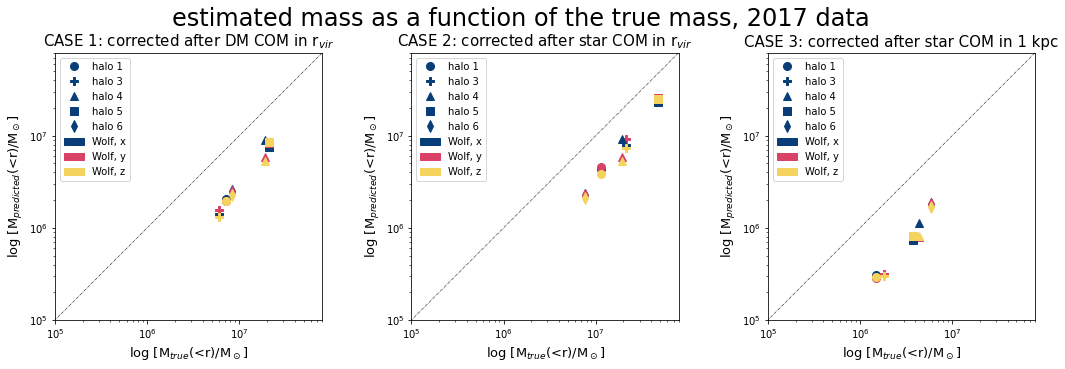

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[15, 5])

patch1 = mpatches.Patch(color='#083D77', label='Wolf, x')
patch2 = mpatches.Patch(color='#DA4167', label='Wolf, y')
patch3 = mpatches.Patch(color='#F4D35E', label='Wolf, z')

# Plotting case 1:
marker1, = ax1.plot(M_real1_h1, M_wolf_x1_h1, 'o', color='#083D77', markersize=8, label='halo 1')
ax1.plot(M_real1_h1, M_wolf_y1_h1, 'o', color='#DA4167', markersize=8)
ax1.plot(M_real1_h1, M_wolf_z1_h1, 'o', color='#F4D35E', markersize=8)
marker3, = ax1.plot(M_real1_h3, M_wolf_x1_h3, 'P', color='#083D77', markersize=8, label='halo 3')
ax1.plot(M_real1_h3, M_wolf_y1_h3, 'P', color='#DA4167', markersize=8)
ax1.plot(M_real1_h3, M_wolf_z1_h3, 'P', color='#F4D35E', markersize=8)
marker4, = ax1.plot(M_real1_h4, M_wolf_x1_h4, '^', color='#083D77', markersize=8, label='halo 4')
ax1.plot(M_real1_h4, M_wolf_y1_h4, '^', color='#DA4167', markersize=8)
ax1.plot(M_real1_h4, M_wolf_z1_h4, '^', color='#F4D35E', markersize=8)
marker5, = ax1.plot(M_real1_h5, M_wolf_x1_h5, 's', color='#083D77', markersize=8, label='halo 5')
ax1.plot(M_real1_h5, M_wolf_y1_h5, 's', color='#DA4167', markersize=8)
ax1.plot(M_real1_h5, M_wolf_z1_h5, 's', color='#F4D35E', markersize=8)
marker6, = ax1.plot(M_real1_h6, M_wolf_x1_h6, 'd', color='#083D77', markersize=8, label='halo 6')
ax1.plot(M_real1_h6, M_wolf_y1_h6, 'd', color='#DA4167', markersize=8)
ax1.plot(M_real1_h6, M_wolf_z1_h6, 'd', color='#F4D35E', markersize=8)

ax1.plot(np.linspace(0, 8e7, 1000), np.linspace(0, 8e7, 1000), color='black', linestyle='-.', linewidth=0.5)

ax1.set_xlabel('log [M$_{true}$(<r)/M$_\odot$]', fontsize=13)
ax1.set_ylabel('log [M$_{predicted}$(<r)/M$_\odot$]', fontsize=13)
ax1.set_xlim(1e5, 8e7)
ax1.set_ylim(1e5, 8e7)
ax1.legend(handles=[marker1, marker3, marker4, marker5, marker6, patch1, patch2, patch3], fontsize=10, loc='upper left')
ax1.set_box_aspect(1)
ax1.set_title('CASE 1: corrected after DM COM in r$_{vir}$', fontsize=15)
ax1.set(xscale='log', yscale='log')

# Plotting case 2:
marker1, = ax2.plot(M_real2_h1, M_wolf_x2_h1, 'o', color='#083D77', markersize=8, label='halo 1')
ax2.plot(M_real2_h1, M_wolf_y2_h1, 'o', color='#DA4167', markersize=8)
ax2.plot(M_real2_h1, M_wolf_z2_h1, 'o', color='#F4D35E', markersize=8)
marker3, = ax2.plot(M_real2_h3, M_wolf_x2_h3, 'P', color='#083D77', markersize=8, label='halo 3')
ax2.plot(M_real2_h3, M_wolf_y2_h3, 'P', color='#DA4167', markersize=8)
ax2.plot(M_real2_h3, M_wolf_z2_h3, 'P', color='#F4D35E', markersize=8)
marker4, = ax2.plot(M_real2_h4, M_wolf_x2_h4, '^', color='#083D77', markersize=8, label='halo 4')
ax2.plot(M_real2_h4, M_wolf_y2_h4, '^', color='#DA4167', markersize=8)
ax2.plot(M_real2_h4, M_wolf_z2_h4, '^', color='#F4D35E', markersize=8)
marker5, = ax2.plot(M_real2_h5, M_wolf_x2_h5, 's', color='#083D77', markersize=8, label='halo 5')
ax2.plot(M_real2_h5, M_wolf_y2_h5, 's', color='#DA4167', markersize=8)
ax2.plot(M_real2_h5, M_wolf_z2_h5, 's', color='#F4D35E', markersize=8)
marker6, = ax2.plot(M_real2_h6, M_wolf_x2_h6, 'd', color='#083D77', markersize=8, label='halo 6')
ax2.plot(M_real2_h6, M_wolf_y2_h6, 'd', color='#DA4167', markersize=8)
ax2.plot(M_real2_h6, M_wolf_z2_h6, 'd', color='#F4D35E', markersize=8)

ax2.plot(np.linspace(0, 8e7, 1000), np.linspace(0, 8e7, 1000), color='black', linestyle='-.', linewidth=0.5)

ax2.set_xlabel('log [M$_{true}$(<r)/M$_\odot$]', fontsize=13)
ax2.set_ylabel('log [M$_{predicted}$(<r)/M$_\odot$]', fontsize=13)
ax2.set_xlim(1e5, 8e7)
ax2.set_ylim(1e5, 8e7)
ax2.legend(handles=[marker1, marker3, marker4, marker5, marker6, patch1, patch2, patch3], fontsize=10, loc='upper left')
ax2.set_box_aspect(1)
ax2.set_title('CASE 2: corrected after star COM in r$_{vir}$', fontsize=15)
ax2.set(xscale='log', yscale='log')

# Plotting case 3:
marker1, = ax3.plot(M_real3_h1, M_wolf_x3_h1, 'o', color='#083D77', markersize=8, label='halo 1')
ax3.plot(M_real3_h1, M_wolf_y3_h1, 'o', color='#DA4167', markersize=8)
ax3.plot(M_real3_h1, M_wolf_z3_h1, 'o', color='#F4D35E', markersize=8)
marker3, = ax3.plot(M_real3_h3, M_wolf_x3_h3, 'P', color='#083D77', markersize=8, label='halo 3')
ax3.plot(M_real3_h3, M_wolf_y3_h3, 'P', color='#DA4167', markersize=8)
ax3.plot(M_real3_h3, M_wolf_z3_h3, 'P', color='#F4D35E', markersize=8)
marker4, = ax3.plot(M_real3_h4, M_wolf_x3_h4, '^', color='#083D77', markersize=8, label='halo 4')
ax3.plot(M_real3_h4, M_wolf_y3_h4, '^', color='#DA4167', markersize=8)
ax3.plot(M_real3_h4, M_wolf_z3_h4, '^', color='#F4D35E', markersize=8)
marker5, = ax3.plot(M_real3_h5, M_wolf_x3_h5, 's', color='#083D77', markersize=8, label='halo 5')
ax3.plot(M_real3_h5, M_wolf_y3_h5, 's', color='#DA4167', markersize=8)
ax3.plot(M_real3_h5, M_wolf_z3_h5, 's', color='#F4D35E', markersize=8)
marker6, = ax3.plot(M_real3_h6, M_wolf_x3_h6, 'd', color='#083D77', markersize=8, label='halo 6')
ax3.plot(M_real3_h6, M_wolf_y3_h6, 'd', color='#DA4167', markersize=8)
ax3.plot(M_real3_h6, M_wolf_z3_h6, 'd', color='#F4D35E', markersize=8)
ax3.plot(np.linspace(0, 8e7, 1000), np.linspace(0, 8e7, 1000), color='black', linestyle='-.', linewidth=0.5)

ax3.set_xlabel('log [M$_{true}$(<r)/M$_\odot$]', fontsize=13)
ax3.set_ylabel('log [M$_{predicted}$(<r)/M$_\odot$]', fontsize=13)
ax3.set_xlim(1e5, 8e7)
ax3.set_ylim(1e5, 8e7)
ax3.legend(handles=[marker1, marker3, marker4, marker5, marker6, patch1, patch2, patch3], fontsize=10, loc='upper left')
ax3.set_box_aspect(1)
ax3.set_title('CASE 3: corrected after star COM in 1 kpc', fontsize=15)
ax3.set(xscale='log', yscale='log')

plt.suptitle('estimated mass as a function of the true mass, 2017 data', fontsize=24)
plt.tight_layout()
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[15, 5])

# Plotting case 1:
ax1.plot(radius_array, analyze.dynamical_mass(radius_array, r_dm_halo1, bin_size), \
             color='#3185FC', linewidth=2, label="dark matter mass profile")
ax1.plot(radius_array, analyze.Wolf_mass_estimator(radius_array, stdev_dm_rhalf_x1), \
         color='#083D77', label="M$_{Wolf}$ from $\sigma_{v_x}$ of stars")
ax1.plot(radius_array, analyze.Wolf_mass_estimator(radius_array, stdev_dm_rhalf_y1), \
         color='#DA4167', label="M$_{Wolf}$ from $\sigma_{v_y}$ of stars")
ax1.plot(radius_array, analyze.Wolf_mass_estimator(radius_array, stdev_dm_rhalf_z1), \
         color='#F4D35E', label="M$_{Wolf}$ from $\sigma_{v_z}$ of stars")
ax1.axvline(r_half1, color='hotpink', linewidth=2)
ax1.text(r_half1 - 0.02, 4e5, '''$r_{half}$ = ''' + str(round(r_half1, 3)) + ''' kpc''', fontsize=10, color='hotpink')
#ax1.set_ylim(0,0.75e6)
#ax1.set_xlim(0,1)
ax1.legend(loc='upper left')
ax1.set_box_aspect(1)
ax1.set_title('CASE 1: corrected after DM COM in r$_{vir}$')

# Plotting case 2:
ax2.plot(radius_array, analyze.dynamical_mass(radius_array, r_dm_halo1, bin_size), \
             color='#3185FC', linewidth=2, label="dark matter mass profile")
ax2.plot(radius_array, analyze.Wolf_mass_estimator(radius_array, stdev_dm_rhalf_x2), \
         color='#083D77', label="M$_{Wolf}$ from $\sigma_{v_x}$ of stars")
ax2.plot(radius_array, analyze.Wolf_mass_estimator(radius_array, stdev_dm_rhalf_y2), \
         color='#DA4167', label="M$_{Wolf}$ from $\sigma_{v_y}$ of stars")
ax2.plot(radius_array, analyze.Wolf_mass_estimator(radius_array, stdev_dm_rhalf_z2), \
         color='#F4D35E', label="M$_{Wolf}$ from $\sigma_{v_z}$ of stars")
ax2.axvline(r_half2, color='hotpink', linewidth=2)
ax2.text(r_half2 - 0.2, 5e5, '''$r_{half}$ = ''' + str(round(r_half2, 3)) + ''' kpc''', fontsize=10, color='hotpink')
#ax2.set_ylim(0,0.75e6)
#ax2.set_xlim(0,1)
ax2.legend(loc='upper left')
ax2.set_box_aspect(1)
ax2.set_title('CASE 2: corrected after star COM in r$_{vir}$')

# Plotting case 3:
ax3.plot(radius_array, analyze.dynamical_mass(radius_array, r_dm_halo1, bin_size), \
             color='#3185FC', linewidth=2, label="dark matter mass profile")
ax3.plot(radius_array_1kpc, analyze.Wolf_mass_estimator(radius_array_1kpc, stdev_dm_rhalf_x3), \
         color='#083D77', label="M$_{Wolf}$ from $\sigma_{v_x}$ of stars")
ax3.plot(radius_array_1kpc, analyze.Wolf_mass_estimator(radius_array_1kpc, stdev_dm_rhalf_y3), \
         color='#DA4167', label="M$_{Wolf}$ from $\sigma_{v_y}$ of stars")
ax3.plot(radius_array_1kpc, analyze.Wolf_mass_estimator(radius_array_1kpc, stdev_dm_rhalf_z3), \
         color='#F4D35E', label="M$_{Wolf}$ from $\sigma_{v_z}$ of stars")
ax3.axvline(r_half3, color='hotpink', linewidth=2)
ax3.text(r_half3 - 0.2, 1.5e7, '''$r_{half}$ = ''' + str(round(r_half3, 3)) + ''' kpc''', fontsize=10, color='hotpink')
ax3.set_ylim(0,3e7)
ax3.set_xlim(0,1)
ax3.legend(loc='upper left')
ax3.set_box_aspect(1)
ax3.set_title('CASE 3: corrected after star COM in 1 kpc')

plt.suptitle('M$_{Wolf}$ as a function of radius, dwarf 1 (2017)', fontsize=21)
plt.tight_layout()
plt.show()

In [23]:
# this saves some of the data for convenience

tot_mass = np.array([M_tot1_h1, M_tot1_h3, M_tot1_h4, M_tot1_h5, M_tot1_h6])
r_half = np.array([r_half1_h1, r_half1_h3, r_half1_h4, r_half1_h5, r_half1_h6])
sigma_vx = np.array([stdev_star_rhalf_x1_h1, stdev_star_rhalf_x1_h3, stdev_star_rhalf_x1_h4, \
                                     stdev_star_rhalf_x1_h5, stdev_star_rhalf_x1_h6])
sigma_vy = np.array([stdev_star_rhalf_y1_h1, stdev_star_rhalf_y1_h3, stdev_star_rhalf_y1_h4, \
                                     stdev_star_rhalf_y1_h5, stdev_star_rhalf_y1_h6])
sigma_vz = np.array([stdev_star_rhalf_z1_h1, stdev_star_rhalf_z1_h3, stdev_star_rhalf_z1_h4, \
                                     stdev_star_rhalf_z1_h5, stdev_star_rhalf_z1_h6])

name = np.array(["halo1", "halo3", "halo4", "halo5", "halo6"])

with open("r_halfs_2017.txt", "w") as f:
    for i in range(np.size(tot_mass)):
        f.write(str(name[i]) + ' ' + str(r_half[i]) + ' ' + str(tot_mass[i]) + ' ' + \
               str(sigma_vx[i]) + ' ' + str(sigma_vy[i]) + ' ' + str(sigma_vz[i]))
        f.write('\n')
    
f.close()
print('success!!')

success!!
